Price Prediction With Regression Analysis in R

In [1]:
install.packages("corrplot")
install.packages("glmnet")
install.packages("ggplot2")



The downloaded binary packages are in
	/var/folders/11/mktbwy31519g01sbl5b6y3_c0000gn/T//RtmpfXoiqS/downloaded_packages

The downloaded binary packages are in
	/var/folders/11/mktbwy31519g01sbl5b6y3_c0000gn/T//RtmpfXoiqS/downloaded_packages

The downloaded binary packages are in
	/var/folders/11/mktbwy31519g01sbl5b6y3_c0000gn/T//RtmpfXoiqS/downloaded_packages


In [2]:
library(ggplot2)
library(corrplot)
library(glmnet)


corrplot 0.92 loaded

Loading required package: Matrix

Loaded glmnet 4.1-8



Task 2: Load the Dataset

In [3]:
# Load the dataset as a data frame
dataset <- read.csv("bitcoin_price_data.csv")
# View the data frame
print(head(dataset))

                timestamp    price      ma5 ma10 macd signalLine rsi
1 2023-06-25 18:00:30.293 30469.36     0.00    0    0          0   0
2 2023-06-25 22:00:21.902 30236.23     0.00    0    0          0   0
3 2023-06-26 02:00:54.258 30401.99     0.00    0    0          0   0
4 2023-06-26 06:00:40.556 30323.57     0.00    0    0          0   0
5 2023-06-26 10:00:12.684 30443.05 30374.84    0    0          0   0
6   2023-06-26 14:00:17.1 30259.43 30332.85    0    0          0   0


Task 3: Explore the Dataset

In [4]:
#Find the dimension of the data frame
dim(dataset)
#Displays internal structure of data frame
str(dataset)

[1] 540   7

'data.frame':	540 obs. of  7 variables:
 $ timestamp : chr  "2023-06-25 18:00:30.293" "2023-06-25 22:00:21.902" "2023-06-26 02:00:54.258" "2023-06-26 06:00:40.556" ...
 $ price     : num  30469 30236 30402 30324 30443 ...
 $ ma5       : num  0 0 0 0 30375 ...
 $ ma10      : num  0 0 0 0 0 ...
 $ macd      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ signalLine: num  0 0 0 0 0 0 0 0 0 0 ...
 $ rsi       : num  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
#Get a list of unique elements in each column
ulist <- lapply(dataset, unique)
ulen <- lengths(ulist)
#Print the number of unique values in each column
print(ulen)

 timestamp      price        ma5       ma10       macd signalLine        rsi 
       540        540        537        532        516        508        527 


Task 4: Preprocess the Dataset

In [6]:
# Print the head of the original data frame
print(head(dataset))


                timestamp    price      ma5 ma10 macd signalLine rsi
1 2023-06-25 18:00:30.293 30469.36     0.00    0    0          0   0
2 2023-06-25 22:00:21.902 30236.23     0.00    0    0          0   0
3 2023-06-26 02:00:54.258 30401.99     0.00    0    0          0   0
4 2023-06-26 06:00:40.556 30323.57     0.00    0    0          0   0
5 2023-06-26 10:00:12.684 30443.05 30374.84    0    0          0   0
6   2023-06-26 14:00:17.1 30259.43 30332.85    0    0          0   0


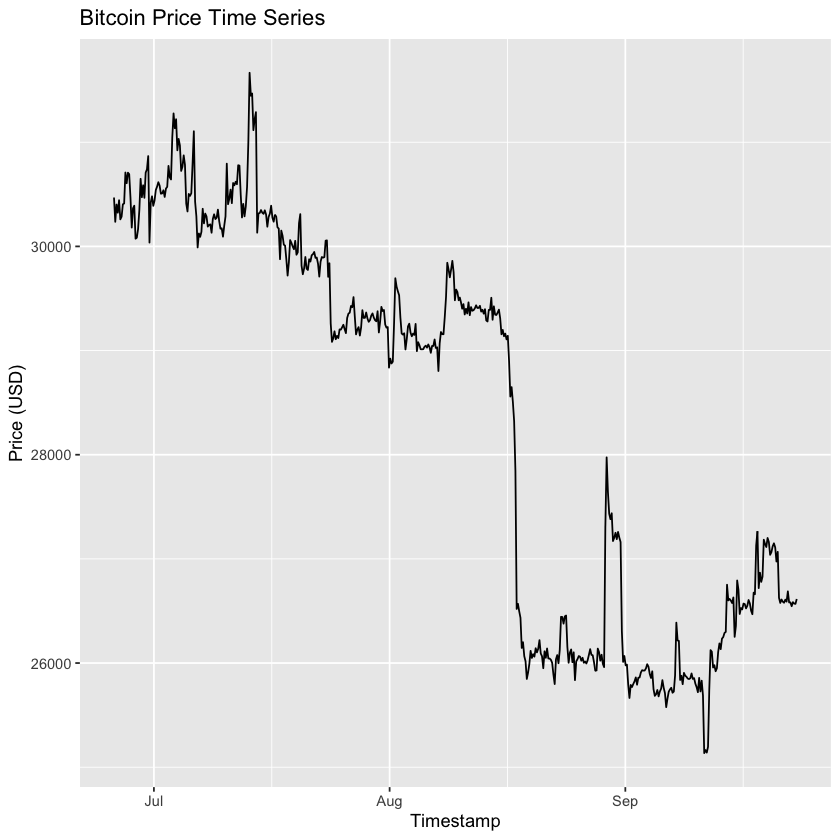

In [7]:
# Convert the timestamp column to a date-time object
dataset$timestamp <- as.POSIXct(dataset$timestamp)

# Plot the price data
ggplot(dataset, aes(x = timestamp, y = price)) +
  geom_line() +
  labs(title = "Bitcoin Price Time Series", x = "Timestamp", y = "Price (USD)")


In [8]:
# Scale data
scaled_data <- scale(dataset)

# Convert to data frame
scaled_dataset <- as.data.frame(scaled_data)

# Display the initial rows of the scaled data frame
print(head(scaled_dataset))


ERROR: Error in colMeans(x, na.rm = TRUE): 'x' debe ser numérico


Task 5: Find Outliers in the Dataset

In [ ]:
#Create a grid of boxplots
par(mfrow=c(2,2))
for (i in 1:length(dataframe)) {
        boxplot(dataframe[,i], main=names(dataframe[i]), type="l", outcol="blue")
}

Task 6: Feature Correlation Visualisation

In [ ]:
#Calculate correlation
dataframe.cor = cor(dataframe)
#Display the correlation plot
corrplot(dataframe.cor)

Linear Regression

Task 7: Split Test and Train Data

In [ ]:
#Make the results reproducible
set.seed(1)

#Use 70% of the dataset as a training set and 30% as a test set
sample <- sample(seq(1, 2), nrow(dataframe), replace=TRUE, prob=c(0.7,0.3))
train_set  <- dataframe[sample==1, ]
test   <- dataframe[sample==2, ]

In [ ]:
# Identify the column number or name of the target variable 'price'
target_col_num <- which(colnames(dataset) == "price")

# Store the features and target variable of the complete dataset separately
x_vars_df <- dataset[,-c(target_col_num)]
y_var_df <- dataset[, c(target_col_num)]


In [ ]:
print(nrow(train_set))
print(nrow(test))

Task 8: Train the Model 

In [ ]:
print(names(train_set))

In [ ]:
print(summary(fit_train))

Task 9: Test the Model

In [ ]:
fit_test = predict(fit_train, newdata=test_set_x)

In [ ]:
#Create a grid for scatter plots
par(mfrow=c(2,2))
for (i in 1:length(test_set_x)) {
     main_label=paste("Relation b/w", names(test_set_x[i]),"& Price", sep = " ", collapse = NULL)
     plot(test_set_x[,i], fit_test , main=main_label, xlab=names(test_set_x[i]), ylab="Price ",pch=19)
     lines(lowess(test_set_x[,i],fit_test), col="blue")
     lines(lowess(test_set_x[,i],test_set_y), col="red")       
}

Task 10: Evaluate the Model

In [ ]:
mse <- ( mean((fit_test- (test_set_y))^2) )
print(mse)

In [ ]:
#find SST and SSE
sst <- sum((test_set_y - mean(test_set_y))^2)
sse <- sum((fit_test - test_set_y)^2)

#find R-Squared of test Data
rsq <- 1 - sse/sst
print(rsq)

 Lasso Regression

Task 11: Prepare the Data 

In [ ]:
#Convert all data frames to matrixes
x_vars <- as.matrix(x_vars_df)
y_var <- as.matrix(y_var_df)
x_test <- as.matrix(test_set_x)
y_test <- as.vector(test_set_y)
x_train <- as.matrix (train_set[, -c(24)])
y_train <- as.vector(train_set[, c(24)])
train <- as.matrix(train_set)

In [ ]:
#Verify the split
print(length(y_train))
print(length(y_test))

Task 12: Create and Run Lasso Regression Model

In [ ]:
lambda_seq <- 10^seq(-2, 2, by = .1)

#Train the model
cv_output <- cv.glmnet(x_train, y_train, alpha = 1, lambda = lambda_seq, nfolds = 5)

Task 13: Find the Best Lambda Value

In [ ]:
plot(cv_output)

In [ ]:
best_lam <- cv_output$lambda.min
print(best_lam)

 Task 14: Build Lasso Model With the Best Lambda

In [ ]:
#Build a Model
lasso_best <- glmnet(x_train, y_train, alpha = 1, lambda = best_lam)

#Display the coefficients of all variables after training
print(coef(lasso_best))

#Display the list of variables with zero coefficients
print("Following variables are declared irrelevant by the model:")
print(coef(lasso_best)[coef(lasso_best)[,1]==0,])

Task 15: Test the Model

In [ ]:
pred <- predict(lasso_best, s = best_lam, newx = x_test)

In [ ]:
#Create a grid for scatter plots
par(mfrow=c(2,2))
for (i in 1:length(test_set_x)) {
     main_label=paste("Relation b/w", names(test_set_x[i]),"& Price", sep = " ", collapse = NULL)
     plot(test_set_x[,i], pred , main=main_label, xlab=names(test_set_x[i]), ylab="Price ",pch=19)
     lines(lowess(test_set_x[,i],pred), col="blue")
     lines(lowess(test_set_x[,i],y_test), col="red")       
}

Task 16: Evaluate the Model

In [ ]:
#Calculate the MSE of the test data:
mse <- (mean((pred - y_test)^2)) 
print(mse)

In [ ]:
#Find SST and SSE
sst <- sum((y_test - mean(y_test))^2)
sse <- sum((pred - y_test)^2)

#Find R-Squared of test Data
rsq <- 1 - sse/sst
print(rsq)